In [27]:
install.packages("dplyr")
install.packages("fastDummies")
install.packages("tidyverse")
install.packages("kableExtra")
install.packages('GGally')
install.packages("corrplot")
library(corrplot)
library(GGally)
library(dplyr)
library(fastDummies)
library(tidyverse)
library(tidymodels)
library(openintro)
library(corrr)
library(knitr)
library(kableExtra)
library(IRdisplay)
library(ggplot2)


The downloaded binary packages are in
	/var/folders/s7/6ncckdrj32j81xfl9hjxkzkr0000gn/T//Rtmpit9iob/downloaded_packages

The downloaded binary packages are in
	/var/folders/s7/6ncckdrj32j81xfl9hjxkzkr0000gn/T//Rtmpit9iob/downloaded_packages


also installing the dependencies ‘colorspace’, ‘sys’, ‘bit’, ‘ps’, ‘farver’, ‘labeling’, ‘munsell’, ‘RColorBrewer’, ‘viridisLite’, ‘rematch’, ‘askpass’, ‘bit64’, ‘prettyunits’, ‘processx’, ‘backports’, ‘blob’, ‘DBI’, ‘gtable’, ‘isoband’, ‘scales’, ‘gargle’, ‘cellranger’, ‘curl’, ‘ids’, ‘rematch2’, ‘cpp11’, ‘openssl’, ‘timechange’, ‘systemfonts’, ‘textshaping’, ‘clipr’, ‘vroom’, ‘tzdb’, ‘progress’, ‘callr’, ‘selectr’, ‘broom’, ‘conflicted’, ‘dbplyr’, ‘dtplyr’, ‘forcats’, ‘ggplot2’, ‘googledrive’, ‘googlesheets4’, ‘haven’, ‘hms’, ‘httr’, ‘lubridate’, ‘modelr’, ‘purrr’, ‘ragg’, ‘readr’, ‘readxl’, ‘reprex’, ‘rstudioapi’, ‘rvest’, ‘tidyr’, ‘xml2’





The downloaded binary packages are in
	/var/folders/s7/6ncckdrj32j81xfl9hjxkzkr0000gn/T//Rtmpit9iob/downloaded_packages


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.1     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


ERROR: Error in library(tidymodels): there is no package called ‘tidymodels’


In [82]:
data <- read.csv('Trabajo Práctico 1/Datasets/eph_train_2023.csv')%>% 
                            mutate(id = 1:nrow(.))

head(data)

,codusu,ano4,trimestre,region,aglomerado,fecha_nacimiento,edad,asistencia_educacion,nivel_ed,tipo_establecimiento,⋯,sexo,categoria_ocupacion,cat_cantidad_empleos,alfabetismo,salario,horas_trabajadas,educacion,experiencia_potencial,salario_horario,id
,<chr>,<int>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<int>
1,TQRMNOPYRHJMKPCDEIGED00785098,2023,3,Pampeana,30,01/01/1900,30,asistio,Secundaria Incompleta,Privada,⋯,Mujer,Obrero o empleado,unico,Sabe leer y escribir,48000,15,10,15,800.0000,1
2,TQRMNOQRXHKMLOCDEHLEH00790365,2023,3,Noroeste,25,01/01/1900,28,asistio,Secundaria Completa,Estatal,⋯,Varon,Obrero o empleado,unico,Sabe leer y escribir,50000,25,13,10,500.0000,2
3,TQRMNOPURHLOLMCDEGPDJ00805561,2023,3,Noroeste,19,22/07/1965,57,asistio,Secundaria Incompleta,Privada,⋯,Varon,Obrero o empleado,unico,Sabe leer y escribir,140000,63,11,41,555.5556,3
4,TQRMNOPTQHJMQTCDEIJAH00786499,2023,3,Gran Buenos Aires,33,20/10/1954,68,asistio,Primaria Completa,Privada,⋯,Varon,Cuenta propia,unico,Sabe leer y escribir,60000,30,8,55,500.0000,4
5,TQRMNOVSTHKNRPCDEIJAH00812204,2023,3,Gran Buenos Aires,33,19/02/1980,43,asistio,Superior Universitaria Completa,Privada,⋯,Mujer,Obrero o empleado,unico,Sabe leer y escribir,170000,40,16,22,1062.5000,5
6,TQRMNOSUXHJOLNCDEOJAH00793052,2023,3,Patagonia,93,02/02/1984,39,asistio,Primaria Completa,Privada,⋯,Mujer,Obrero o empleado,unico,Sabe leer y escribir,100000,48,8,26,520.8333,6


In [3]:
glimpse(data)

Rows: 11,772
Columns: 20
$ codusu                <chr> "TQRMNOPYRHJMKPCDEIGED00785098", "TQRMNOQRXHKMLO…
$ ano4                  <int> 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, …
$ trimestre             <int> 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, …
$ region                <chr> "Pampeana", "Noroeste", "Noroeste", "Gran Buenos…
$ aglomerado            <int> 30, 25, 19, 33, 33, 93, 14, 91, 22, 36, 18, 29, …
$ fecha_nacimiento      <chr> "01/01/1900", "01/01/1900", "22/07/1965", "20/10…
$ edad                  <int> 30, 28, 57, 68, 43, 39, 35, 60, 62, 32, 33, 54, …
$ asistencia_educacion  <chr> "asistio", "asistio", "asistio", "asistio", "asi…
$ nivel_ed              <chr> "Secundaria\nIncompleta", "Secundaria\nCompleta"…
$ tipo_establecimiento  <chr> "Privada", "Estatal", "Privada", "Privada", "Pri…
$ codigo_actividad      <int> 5601, 8401, 4903, 4803, 8501, 101, 1600, 8401, 8…
$ sexo                  <chr> "Mujer", "Varon", "Varon", "Varon", "Mujer", "Mu…
$ categoria_ocu

El dataset cuenta con 11,772 filas y 20 columnas. A continuación se detalla la información sobre las columnas:

##### Tipo 'int'

- ano4 : Año de relevamiento
- trimestre : Trimestre de relevamiento
- aglomerado: aglomerado urbano de residencia
- edad: Años cumplidos
- codigo_actividad: Código de actividad económica (Clasificador de Actividades Económicas para Encuestas Sociodemográficas del Mercosur)
- salario: Salario mensual.
- educacion: Años de educación estimados
- experiencia_potencial: Estimación de la experiencia laboral, calculada a partir de la diferencia entre la edad y una estimación de los años de educación
- salario_horario: ingreso por hora trabajada en el mes (de la ocupación principal y ocupaciones secundarias)

##### Tipo 'dbl'

- salario_horario: ingreso por hora trabajada en el mes (de la ocupación principal y ocupaciones secundarias)

##### Tipo 'chr'

- codusu: ID de la observación
- region: región de residencia
- fecha_nacimiento: Fecha de nacimiento
- asistencia_educacion: ¿Asiste o asistió a algún establecimiento educativo?
- nivel_ed: Nivel educativo en que se encuentra la persona
- tipo_establecimiento: ¿El negocio / empresa / institución / actividad en la que trabaja es público o privado?
- sexo: Sexo (binario)
- categoria_ocupacion: Categoría ocupacional
- cat_cantidad_empleos: ¿La semana pasada tenía 1 o tenía múltiples empleos?
- alfabetismo: ¿Sabe leer y escribir?



Se realizan las siguientes transformaciones: 
- fecha_naciemiento => Transformo la columna a Data, luego calculo la edad de la persona.('edad_calculada')
- region => Se puede hacer un one_hot_encoding
- asistencia_educacion => Se puede hacer un one_hot_encoding
- nivel_ed => orden jerarquico
- tipo_establecimiento => one_hot_encoding
- sexo => booleana
- categoria_ocupacion => one_hot_encoring
- cat_cantidad_empleos => booleana
- alfabetismo => booleana


In [4]:

# Genero una lista con el nombre de las columnas tipo 'chr' que quiero evaluar
columnas_a_seleccionar <- c(
    "fecha_nacimiento",
    "region",
    "asistencia_educacion",
    "nivel_ed",
    "tipo_establecimiento",
    "sexo",
    "categoria_ocupacion",
    "cat_cantidad_empleos",
    "alfabetismo"
)

# Selecciono todas las columnas 'chr' excepto fecha_nacimiento , codusu y el id. Miro los valores posibles de cada columna. ("\n" -> salto de linea)
# Utilizo "cat" para concatenar objetos y strings

data_uniques <- data %>%
    select(all_of(columnas_a_seleccionar))%>%
    select(-fecha_nacimiento)

for (i in names(data_uniques)) {
    cat("Nombre de la columna:", i, "\n")
    cat("Valores únicos:\n")
    print(unique(data_uniques[[i]]))
    cat("\n")
}

Nombre de la columna: region 
Valores únicos:
[1] "Pampeana"          "Noroeste"          "Gran Buenos Aires"
[4] "Patagonia"         "Cuyo"              "Noreste"          

Nombre de la columna: asistencia_educacion 
Valores únicos:
[1] "asistio"            "asiste actualmente" NA                  

Nombre de la columna: nivel_ed 
Valores únicos:
[1] "Secundaria\nIncompleta"              "Secundaria\nCompleta"               
[3] "Primaria\nCompleta"                  "Superior\nUniversitaria\nCompleta"  
[5] "Superior\nUniversitaria\nIncompleta" "Primaria\nIncompleta"               

Nombre de la columna: tipo_establecimiento 
Valores únicos:
[1] "Privada" "Estatal" "Otra"   

Nombre de la columna: sexo 
Valores únicos:
[1] "Mujer" "Varon"

Nombre de la columna: categoria_ocupacion 
Valores únicos:
[1] "Obrero o empleado"           "Cuenta propia"              
[3] "Patron"                      "Trabajador sin remuneracion"

Nombre de la columna: cat_cantidad_empleos 
Valores únicos:


In [17]:
head(data)

,codusu,ano4,trimestre,region,aglomerado,fecha_nacimiento,edad,asistencia_educacion,nivel_ed,tipo_establecimiento,codigo_actividad,sexo,categoria_ocupacion,cat_cantidad_empleos,alfabetismo,salario,horas_trabajadas,educacion,experiencia_potencial,salario_horario
,<chr>,<int>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>
1,TQRMNOPYRHJMKPCDEIGED00785098,2023,3,Pampeana,30,01/01/1900,30,asistio,Secundaria Incompleta,Privada,5601,Mujer,Obrero o empleado,unico,Sabe leer y escribir,48000,15,10,15,800.0000
2,TQRMNOQRXHKMLOCDEHLEH00790365,2023,3,Noroeste,25,01/01/1900,28,asistio,Secundaria Completa,Estatal,8401,Varon,Obrero o empleado,unico,Sabe leer y escribir,50000,25,13,10,500.0000
3,TQRMNOPURHLOLMCDEGPDJ00805561,2023,3,Noroeste,19,22/07/1965,57,asistio,Secundaria Incompleta,Privada,4903,Varon,Obrero o empleado,unico,Sabe leer y escribir,140000,63,11,41,555.5556
4,TQRMNOPTQHJMQTCDEIJAH00786499,2023,3,Gran Buenos Aires,33,20/10/1954,68,asistio,Primaria Completa,Privada,4803,Varon,Cuenta propia,unico,Sabe leer y escribir,60000,30,8,55,500.0000
5,TQRMNOVSTHKNRPCDEIJAH00812204,2023,3,Gran Buenos Aires,33,19/02/1980,43,asistio,Superior Universitaria Completa,Privada,8501,Mujer,Obrero o empleado,unico,Sabe leer y escribir,170000,40,16,22,1062.5000
6,TQRMNOSUXHJOLNCDEOJAH00793052,2023,3,Patagonia,93,02/02/1984,39,asistio,Primaria Completa,Privada,101,Mujer,Obrero o empleado,unico,Sabe leer y escribir,100000,48,8,26,520.8333


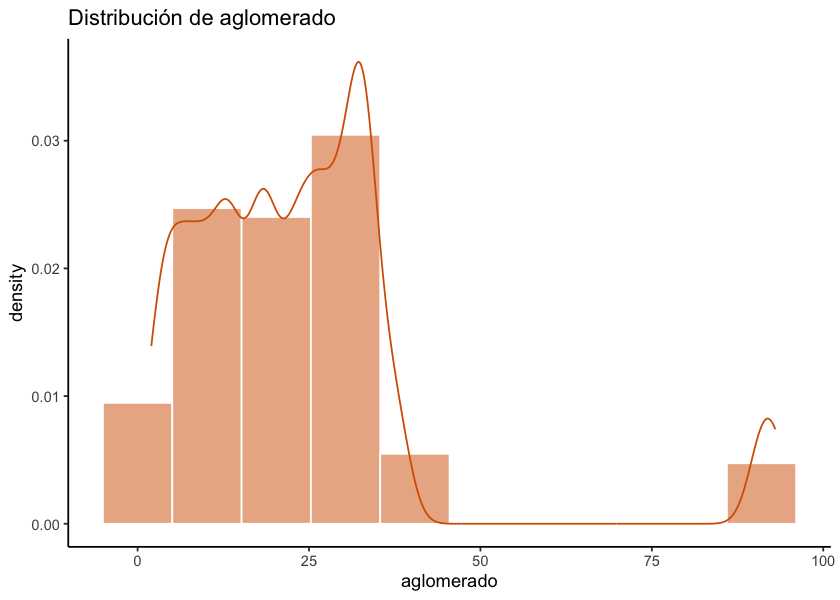

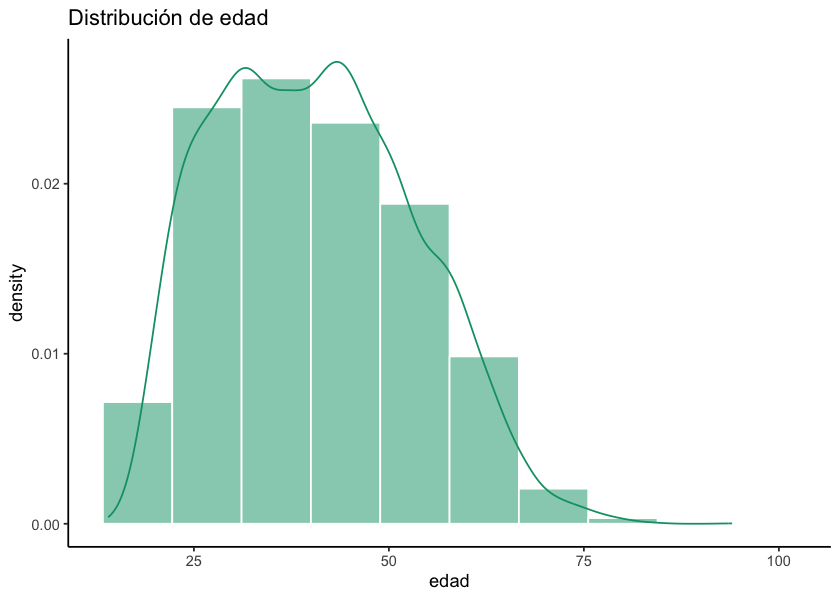

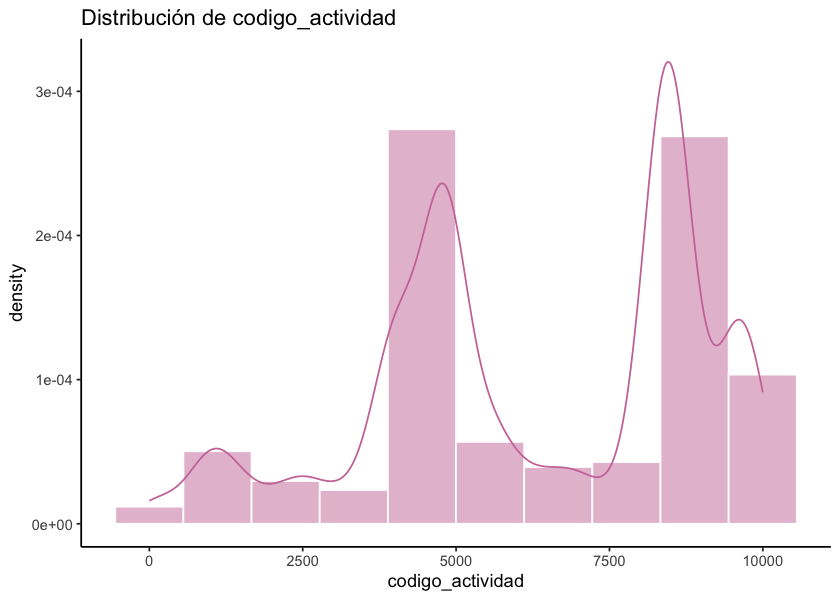

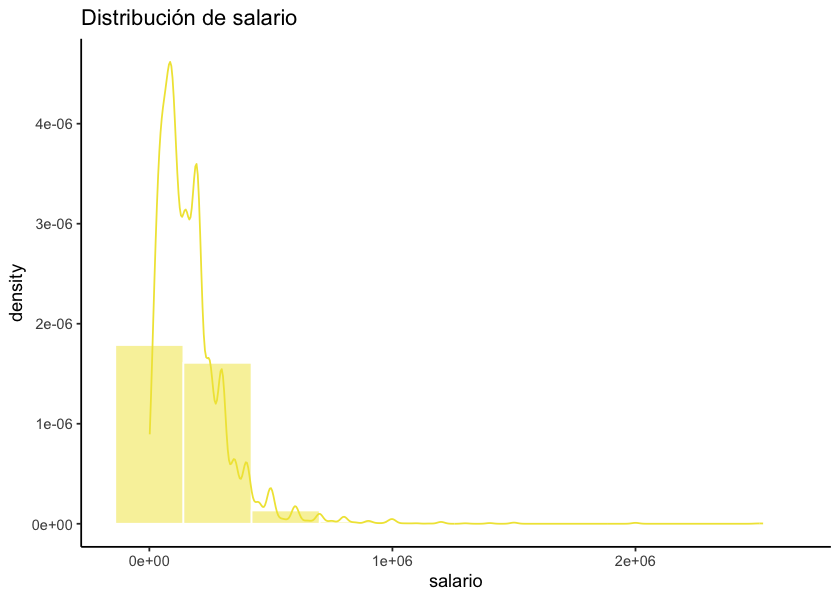

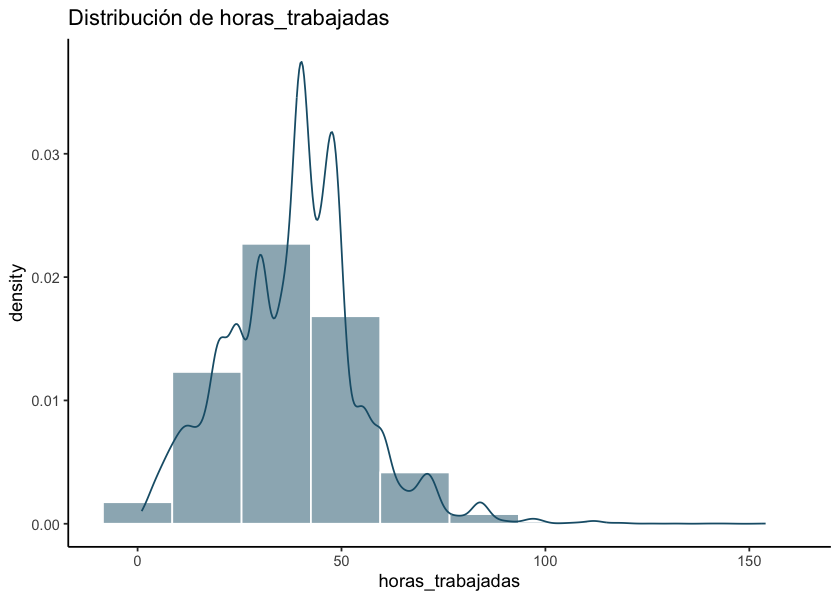

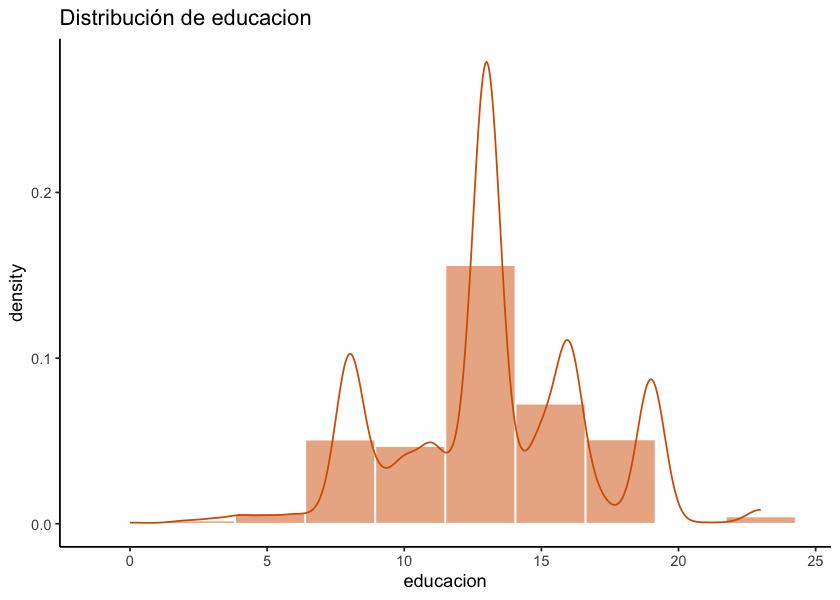

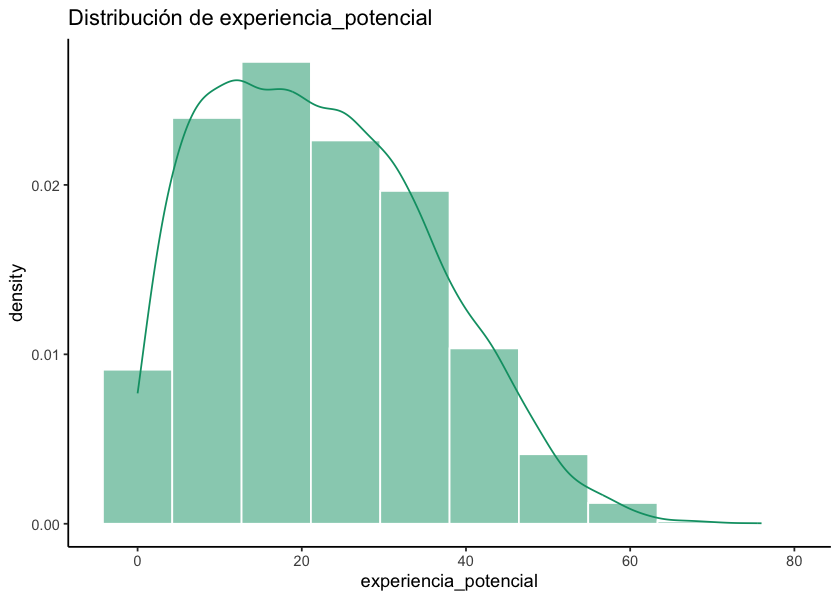

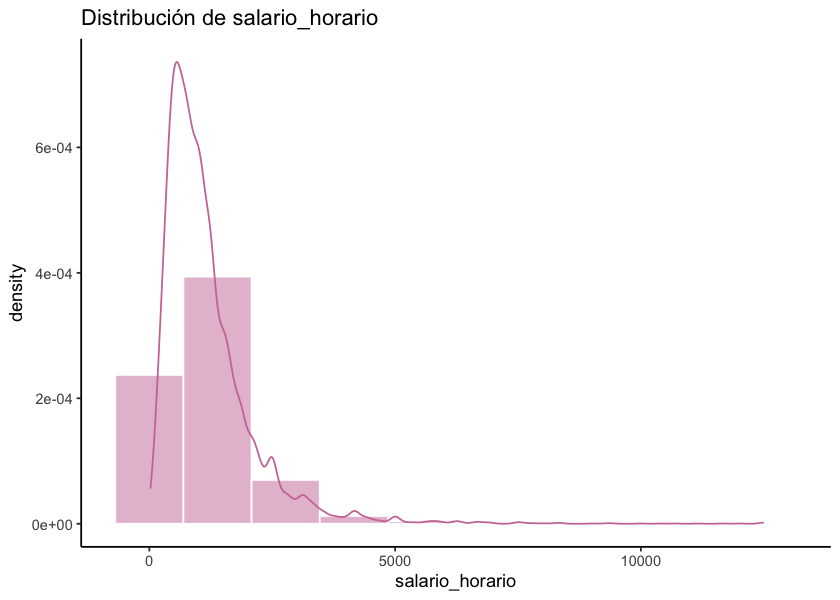

In [112]:
options(repr.plot.width = 7, repr.plot.height = 5)

colors <- c("#1B5E77", "#D55E00", "#009E73", "#CC79A7", "#F0E442")

is_continuous <- function(x) {
  is.numeric(x) && (length(unique(x)) > 2)  
}

data_numeric_continuous <- data %>%
  select(where(is_continuous))

num_graphs <- ncol(data_numeric_continuous%>% select(-id))

for (i in seq_len(num_graphs)) {
  column_name <- colnames(data_numeric_continuous)[i]
  color <- colors[i %% length(colors) + 1]  
  
  p <- ggplot(data_numeric_continuous %>% select(-id), aes_string(x = column_name)) +
    geom_histogram(bins = 10, aes(y = ..density..), position = "identity", alpha = 0.5, fill = color, color = "white") +
    geom_density(alpha = 0.6, color = color) +
    theme(legend.position = "top") + 
    theme_classic() +
    ggtitle(paste("Distribución de", column_name))
  
  print(p)
}


In [87]:
names(data)

[1] "codusu"                "ano4"                  "trimestre"            
 [4] "region"                "aglomerado"            "fecha_nacimiento"     
 [7] "edad"                  "asistencia_educacion"  "nivel_ed"             
[10] "tipo_establecimiento"  "codigo_actividad"      "sexo"                 
[13] "categoria_ocupacion"   "cat_cantidad_empleos"  "alfabetismo"          
[16] "salario"               "horas_trabajadas"      "educacion"            
[19] "experiencia_potencial" "salario_horario"       "id"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


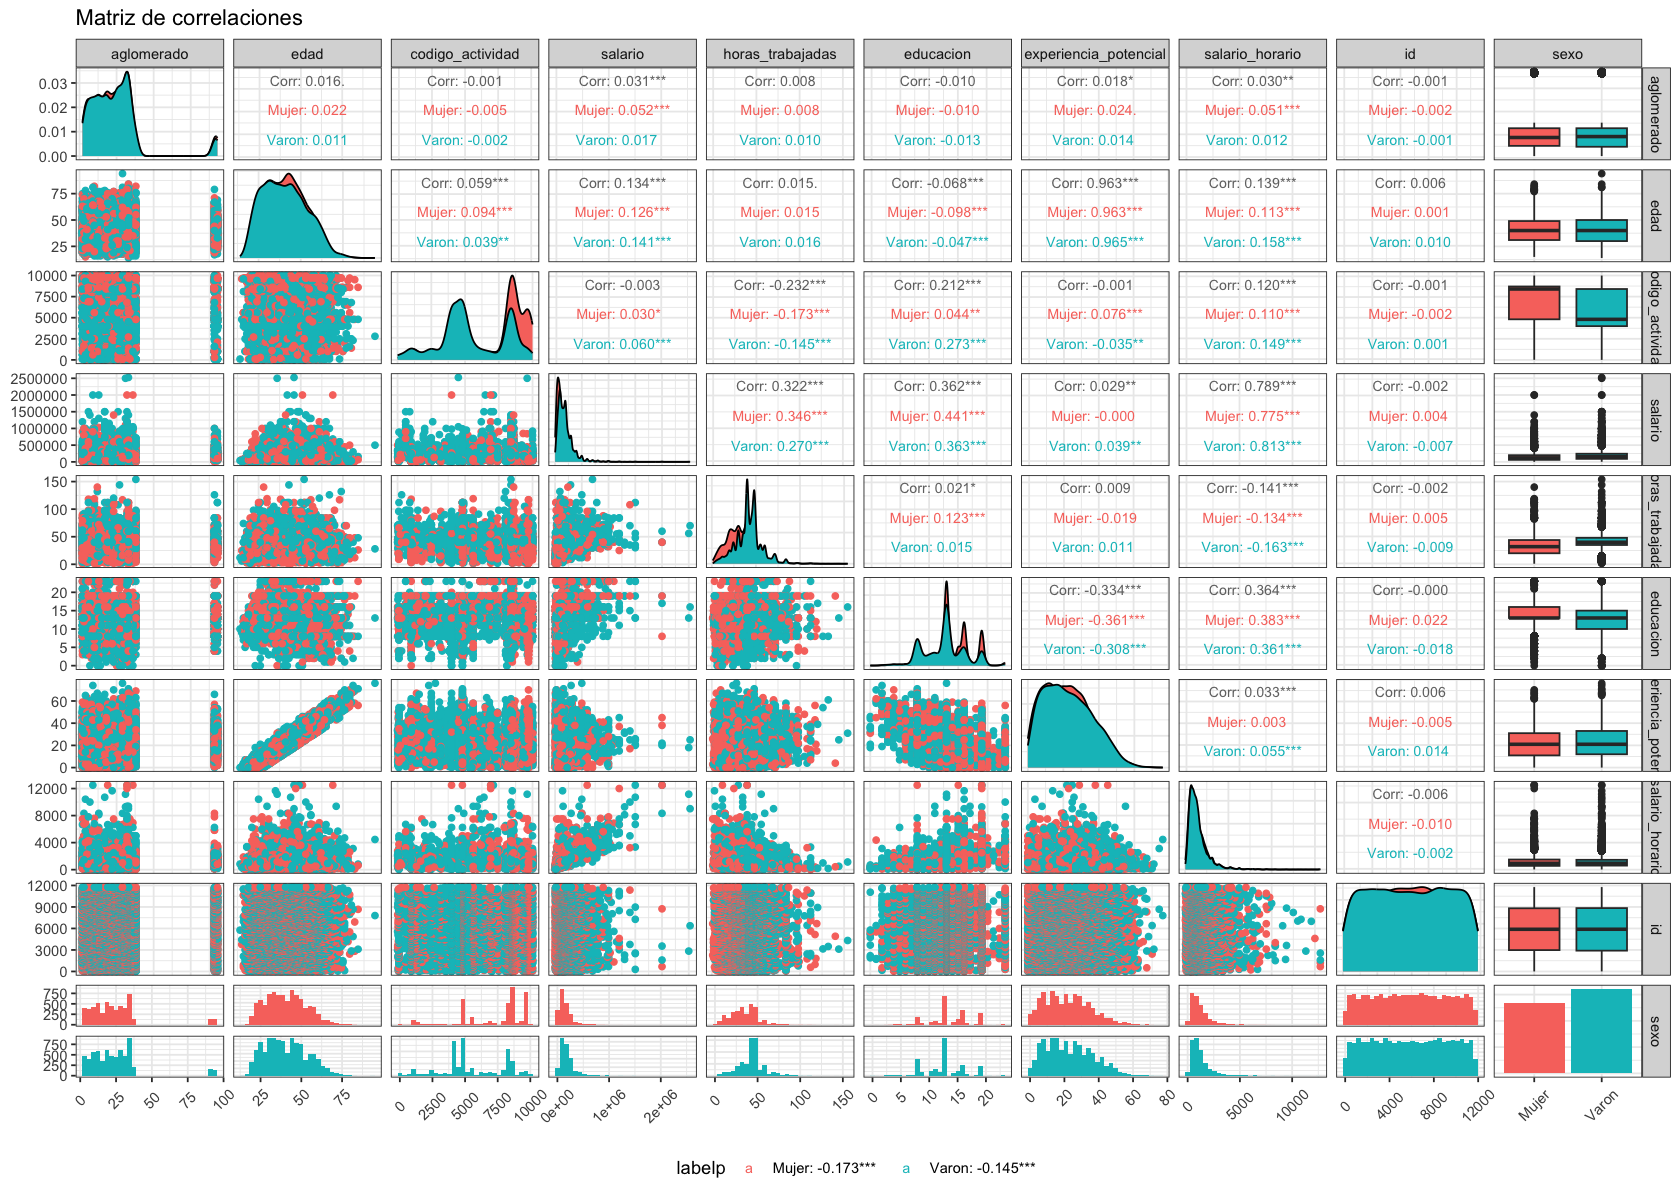

In [116]:
# Ajustar el tamaño del gráfico en Jupyter Lab
options(repr.plot.width = 14, repr.plot.height = 10)

data_combined <- data_numeric_continuous %>% 
  left_join(data %>% select(id, sexo), by = "id") %>% 
  mutate(
    sexo = factor(sexo)
  )


ggpairs(data_combined, 
        mapping = aes(colour = sexo), 
        title = "Matriz de correlaciones",
        upper = list(continuous = wrap("cor", size = 3, hjust = 0.5)), 
        legend = 25) + 
  theme_bw() +
  theme(axis.text.x = element_text(angle = 45, vjust = 0.5), 
        legend.position = "bottom")


In [118]:
# calculamos covarianza 
cov(data$salario_horario, data$salario)

[1] 115147135

In [123]:
data %>% 
 correlate() %>% 
  rplot()

ERROR: Error in rplot(.): could not find function "rplot"


In [122]:
install.packages("corrplot")
library(corrplot)


The downloaded binary packages are in
	/var/folders/s7/6ncckdrj32j81xfl9hjxkzkr0000gn/T//Rtmpit9iob/downloaded_packages


corrplot 0.94 loaded



also installing the dependencies ‘mnormt’, ‘GPArotation’





The downloaded binary packages are in
	/var/folders/s7/6ncckdrj32j81xfl9hjxkzkr0000gn/T//Rtmpit9iob/downloaded_packages



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




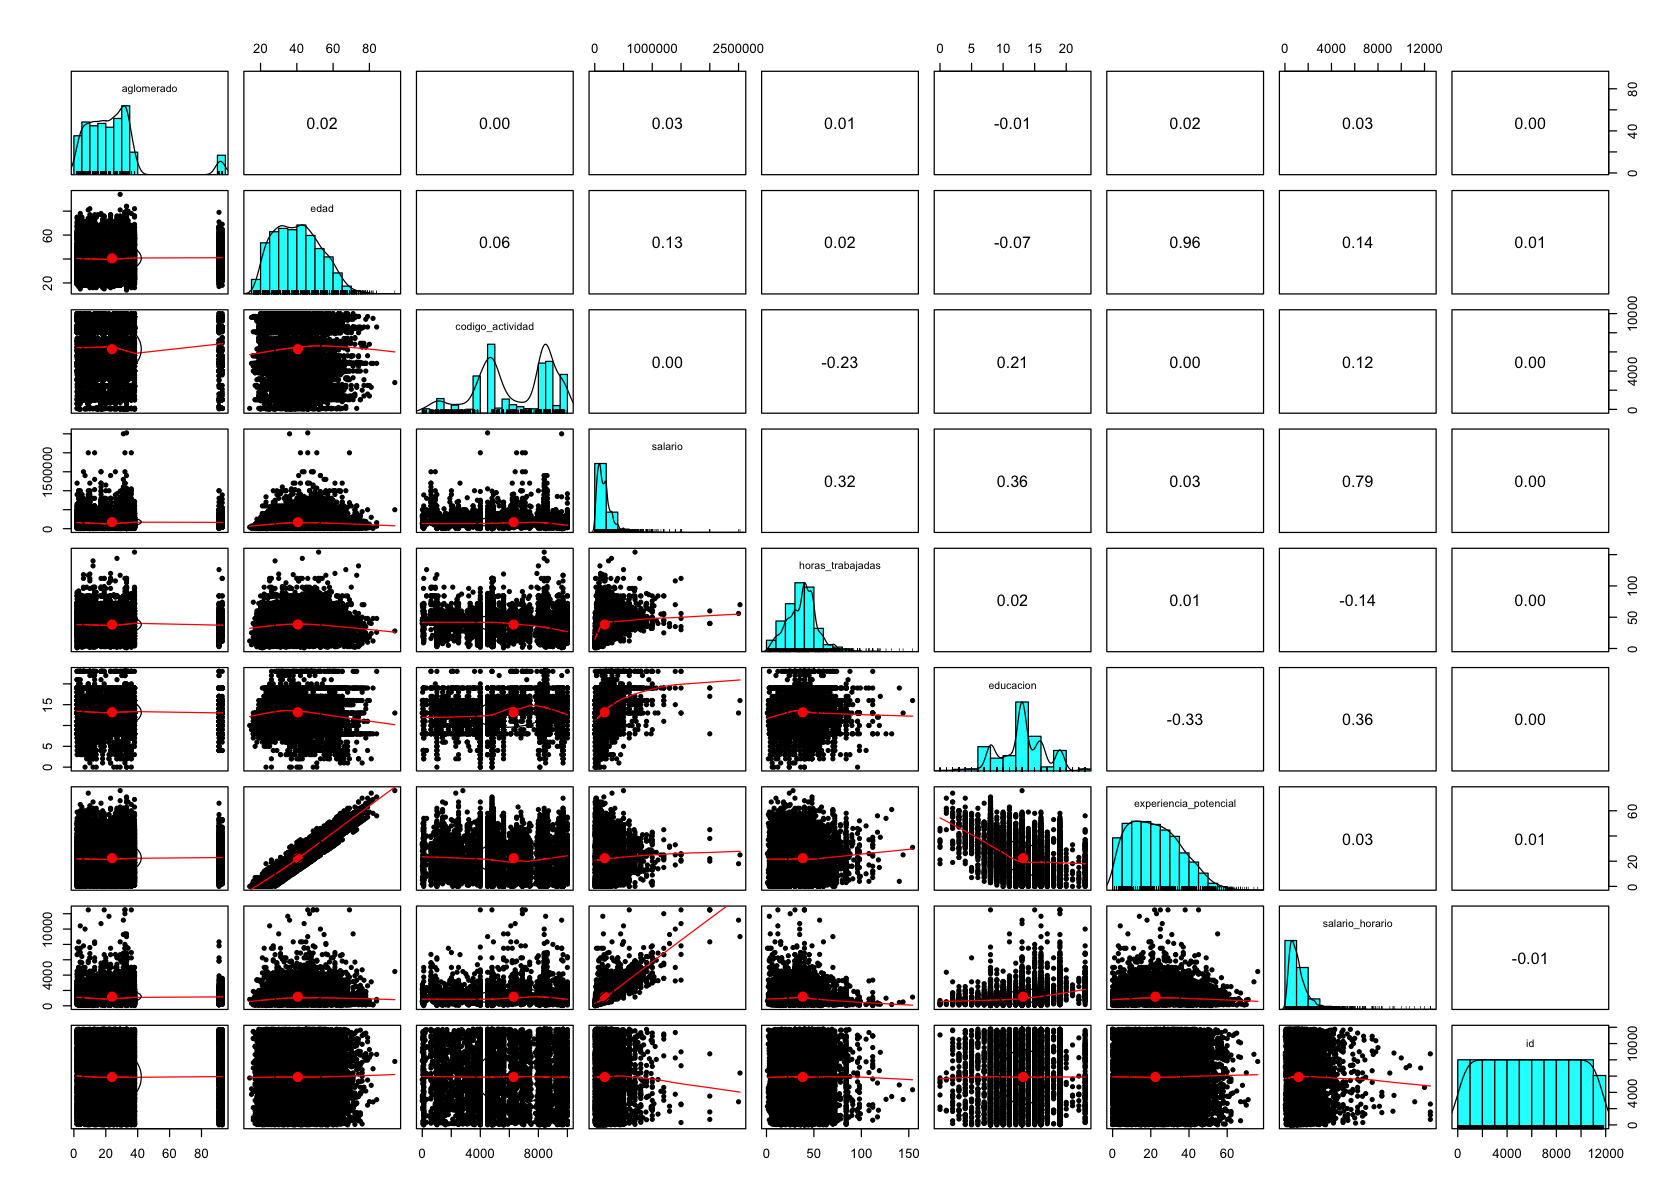

In [124]:
install.packages("psych")
library(psych)

# Crear una matriz de gráficos de dispersión con correlaciones
pairs.panels(data_numeric_continuous)


In [18]:
# # Modelo Edad
# modelo_edad = lm(formula = salario_horario ~ edad_calculada, data = data_transformada)
# # Modelo Educacion
# modelo_experiencia = lm(formula = salario_horario ~ nivel_ed, data = data_transformada)
# Modelo empresa
lm = lm(formula = salario_horario ~ experiencia_potencial, data = data)

mlm = lm(formula = salario_horario ~ experiencia_potencial + I(experiencia_potencial^2), data = data)

In [22]:
summary(lm)


Call:
lm(formula = salario_horario ~ experiencia_potencial, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1232.5  -603.3  -235.5   294.4 11314.4 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           1133.3613    17.4273  65.034  < 2e-16 ***
experiencia_potencial    2.3743     0.6682   3.554 0.000382 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 970.8 on 11770 degrees of freedom
Multiple R-squared:  0.001072,	Adjusted R-squared:  0.0009868 
F-statistic: 12.63 on 1 and 11770 DF,  p-value: 0.0003816


In [23]:
anova(lm)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
experiencia_potencial,1,11899797,11899797.3,12.62741,0.0003816193
Residuals,11770,11091790450,942378.1,NA,NA


In [24]:
summary(mlm)


Call:
lm(formula = salario_horario ~ experiencia_potencial + I(experiencia_potencial^2), 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1236.6  -592.9  -237.2   283.7 11357.1 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                913.5340    25.9187   35.25   <2e-16 ***
experiencia_potencial       26.9662     2.2559   11.95   <2e-16 ***
I(experiencia_potencial^2)  -0.4860     0.0426  -11.41   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 965.5 on 11769 degrees of freedom
Multiple R-squared:  0.012,	Adjusted R-squared:  0.01183 
F-statistic: 71.45 on 2 and 11769 DF,  p-value: < 2.2e-16


In [25]:
anova(mlm)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
experiencia_potencial,1,11899797,11899797.3,12.76594,3.543980e-04
I(experiencia_potencial^2),1,121296678,121296677.8,130.12546,5.527704e-30
Residuals,11769,10970493772,932151.7,NA,NA


In [19]:
?lm

lm {stats},R Documentation
formula,"an object of class ""formula"" (or one that can be coerced to that class): a symbolic description of the model to be fitted. The details of model specification are given under ‘Details’."
data,"an optional data frame, list or environment (or object coercible by as.data.frame to a data frame) containing the variables in the model. If not found in data, the variables are taken from environment(formula), typically the environment from which lm is called."
subset,an optional vector specifying a subset of observations to be used in the fitting process. (See additional details about how this argument interacts with data-dependent bases in the ‘Details’ section of the model.frame documentation.)
weights,"an optional vector of weights to be used in the fitting process. Should be NULL or a numeric vector. If non-NULL, weighted least squares is used with weights weights (that is, minimizing sum(w*e^2)); otherwise ordinary least squares is used. See also ‘Details’,"
na.action,"a function which indicates what should happen when the data contain NAs. The default is set by the na.action setting of options, and is na.fail if that is unset. The ‘factory-fresh’ default is na.omit. Another possible value is NULL, no action. Value na.exclude can be useful."
method,"the method to be used; for fitting, currently only method = ""qr"" is supported; method = ""model.frame"" returns the model frame (the same as with model = TRUE, see below)."
"model, x, y, qr","logicals. If TRUE the corresponding components of the fit (the model frame, the model matrix, the response, the QR decomposition) are returned."
singular.ok,logical. If FALSE (the default in S but not in R) a singular fit is an error.
contrasts,an optional list. See the contrasts.arg of model.matrix.default.
offset,"this can be used to specify an a priori known component to be included in the linear predictor during fitting. This should be NULL or a numeric vector or matrix of extents matching those of the response. One or more offset terms can be included in the formula instead or as well, and if more than one are specified their sum is used. See model.offset."
